In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("./28-urban_pedestrian_locations_with_labels.csv")
df.shape

(500, 3)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   x_position    500 non-null    float64
 1   y_position    500 non-null    float64
 2   true_cluster  500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [4]:
df.head()

x_position  y_position  true_cluster
0    0.830586   -0.447733             1
1    0.701678    0.816918             0
2    1.022080   -0.492571             1
3   -0.316765    0.953438             0
4    0.293226    1.057185             0

<Axes: xlabel='x_position', ylabel='y_position'>

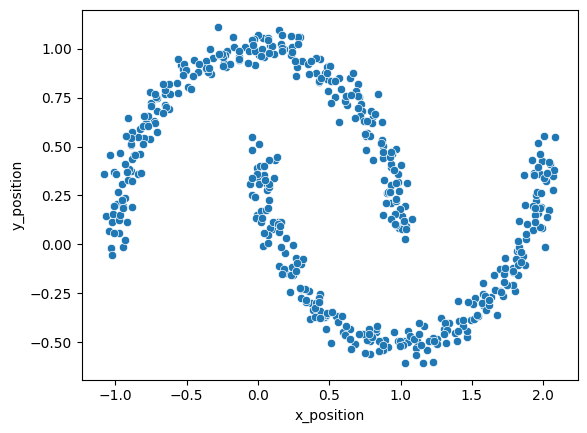

In [5]:
sns.scatterplot(x=df["x_position"],y=df["y_position"])

In [6]:
df=df.drop("true_cluster",axis=1)

In [7]:
df.head()

x_position  y_position
0    0.830586   -0.447733
1    0.701678    0.816918
2    1.022080   -0.492571
3   -0.316765    0.953438
4    0.293226    1.057185

In [8]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_scaled=scaler.fit_transform(df)

In [9]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN()

dbscan.fit(X_scaled)

DBSCAN()

In [10]:
dbscan.labels_

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

In [11]:
X_scaled=pd.DataFrame(X_scaled,columns=["x_position","y_position"])

In [12]:
X_scaled

x_position  y_position
0      0.375125   -1.403679
1      0.226815    1.135628
2      0.595442   -1.493710
3     -0.944918    1.409748
4     -0.243115    1.618062
..          ...         ...
495   -0.304636    1.474047
496   -0.497472   -0.133542
497    0.098642   -1.238718
498    1.282741   -1.074231
499   -0.317055    1.631692

[500 rows x 2 columns]

<Axes: xlabel='x_position', ylabel='y_position'>

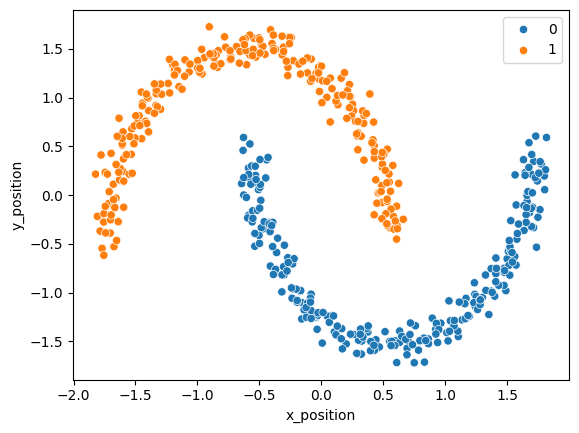

In [14]:
sns.scatterplot(data=X_scaled,x="x_position",y="y_position",hue=dbscan.labels_)

### Hyperparameter Tuning

In [15]:

eps_values=[0.1,0.2,0.3,0.4,0.5,0.6]
min_sample_values=[4,5,6]

In [18]:
from sklearn.metrics import silhouette_score

In [20]:
results=[]

for eps in eps_values:
    for min_sample in min_sample_values:
        db=DBSCAN(eps=eps,min_samples=min_sample).fit(X_scaled)
        labels=db.labels_

        if len(set(labels))<=1:
            continue
        else:
            s_score=silhouette_score(X_scaled,labels)
            results.append({
                "eps":eps,
                "min_sample":min_sample,
                "silhouette score":s_score,
                "n_clusters":len(set(labels))-(1 if -1 in labels else 0)

            })

result_df=pd.DataFrame(results)
result_df=result_df.sort_values(by="silhouette score",ascending=False)
result_df

eps  min_sample  silhouette score  n_clusters
4   0.2           5          0.389338           2
3   0.2           4          0.389338           2
14  0.5           6          0.389338           2
11  0.4           6          0.389338           2
5   0.2           6          0.389338           2
6   0.3           4          0.389338           2
8   0.3           6          0.389338           2
7   0.3           5          0.389338           2
9   0.4           4          0.389338           2
10  0.4           5          0.389338           2
16  0.6           5          0.389338           2
15  0.6           4          0.389338           2
12  0.5           4          0.389338           2
13  0.5           5          0.389338           2
17  0.6           6          0.389338           2
2   0.1           6          0.287040          18
0   0.1           4          0.146899           9
1   0.1           5          0.146570          15

##### HDBSCAN

In [22]:
from sklearn.cluster import HDBSCAN

hdbscan=HDBSCAN()
hdbscan

HDBSCAN()

In [23]:
hdbscan.fit(X_scaled)


HDBSCAN()

In [24]:
hdbscan.labels_

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

<Axes: xlabel='x_position', ylabel='y_position'>

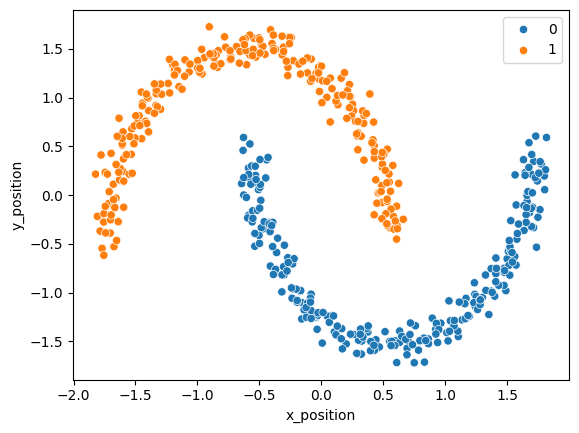

In [26]:
sns.scatterplot(data=X_scaled,x="x_position",y="y_position",hue=hdbscan.labels_)